In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# imshow function
def imshow(title="Image", image=None, size=12):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

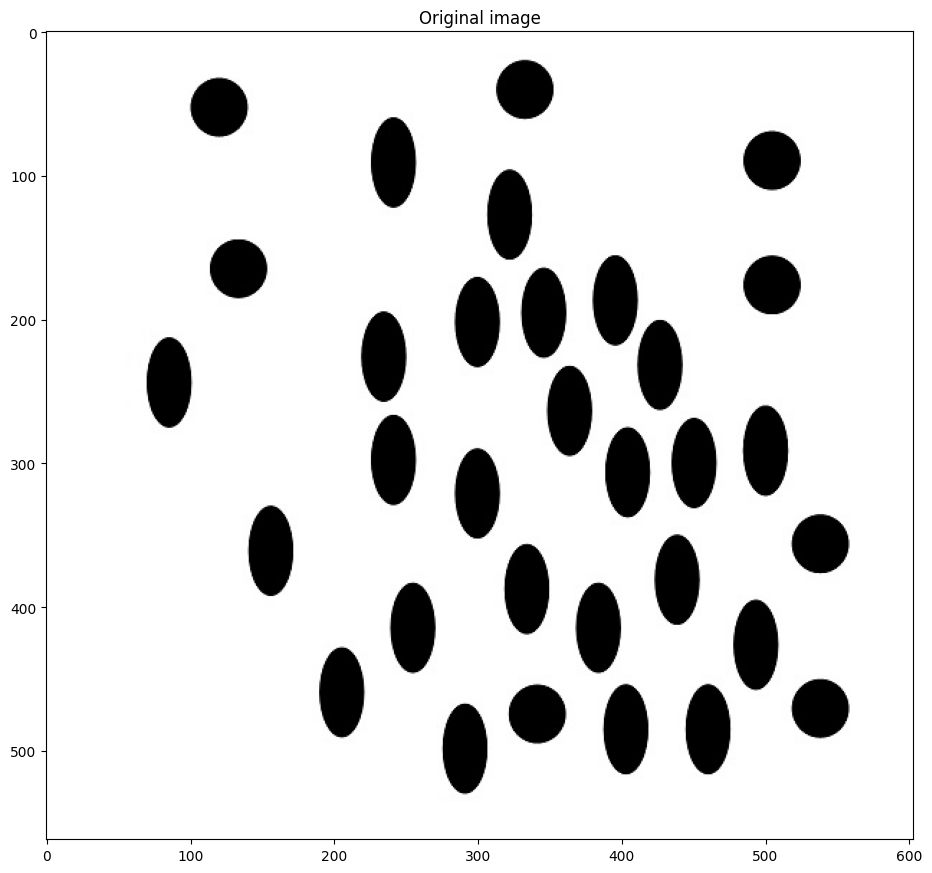

In [4]:
image = cv2.imread("images/blobs.jpg", 0)
imshow("Original image", image)

In [5]:
# Initialize the Detector and detect blobs

detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(image)

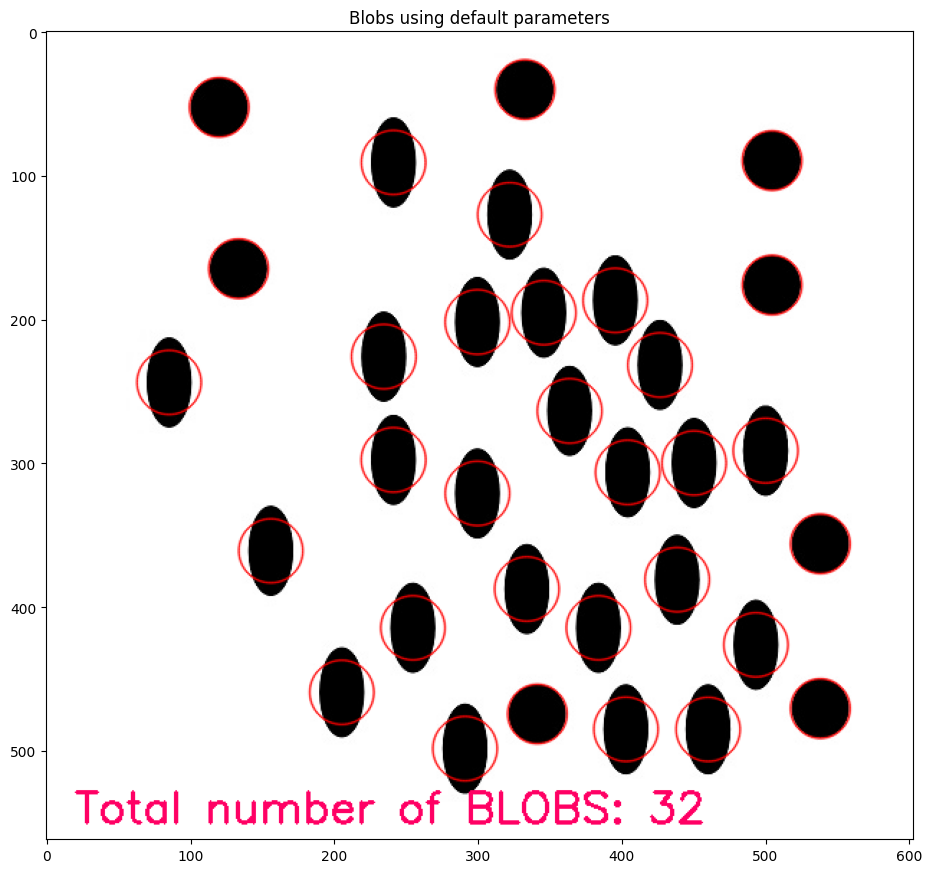

In [6]:
# Draw markers

blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = f"Total number of BLOBS: {number_of_blobs}"
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

imshow("Blobs using default parameters", blobs)

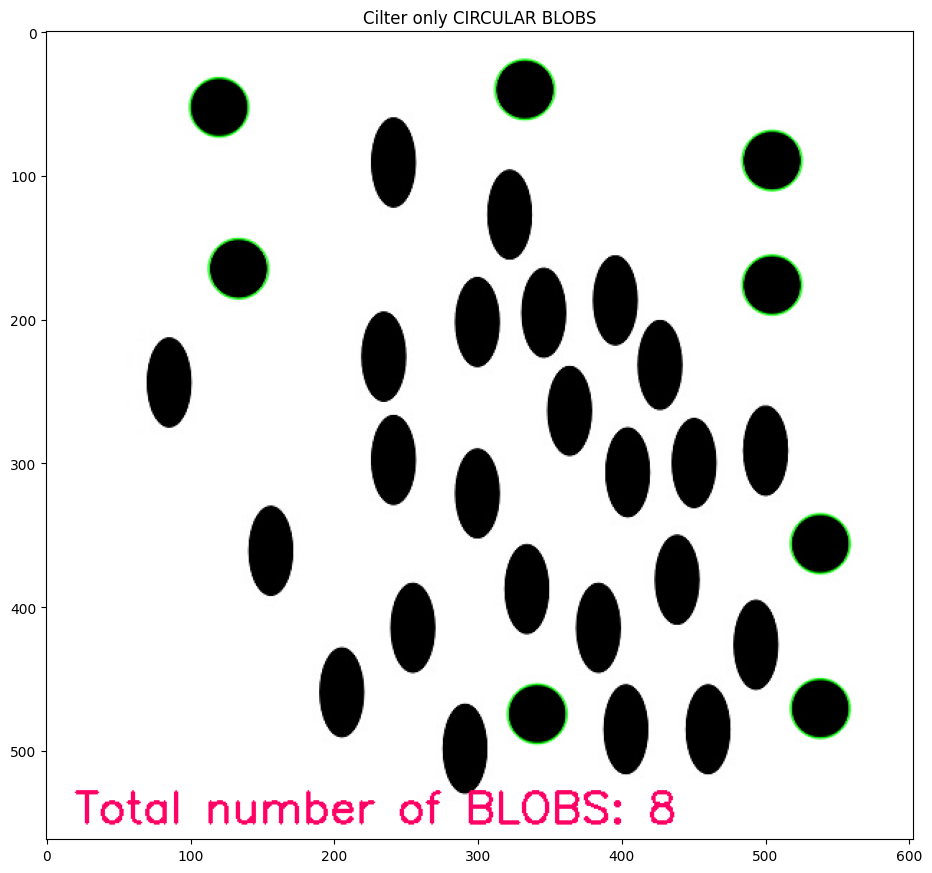

In [7]:
params = cv2.SimpleBlobDetector_Params()

params.filterByArea = True
params.minArea = 100
params.filterByCircularity = True
params.minCircularity = 0.9
params.filterByConvexity = False
params.minConvexity = 0.2
params.filterByInertia = True
params.minInertiaRatio = 0.01

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(image)


blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 255, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = f"Total number of BLOBS: {number_of_blobs}"
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

imshow("Cilter only CIRCULAR BLOBS", blobs)